Firstly, you will implement the function myhist3 that computes a 3-D histogram
from a three channel image. The images you will use are RGB, but the function
should also work on other color spaces. The resulting histogram is stored in a 3-D
matrix. The size of the resulting histogram is determined by the parameter n_bins.
1
The bin range calculation is exactly the same as in the previous assignment, except
now you will get one index for each image channel. Iterate through the image pixels
and increment the appropriate histogram cells. You can create an empty 3-D numpy
array with H = np.zeros((n_bins,n_bins,n_bins)). Take care that you normalize
the resulting histogram.

In [103]:
from array import array
from UZ_utils import *
import numpy as np
import cv2
from matplotlib import pyplot as plt
from a2_utils import *


def myhist2(I, numofbins):
    I = I.reshape(-1)
    max_v = max(I)
    min_v = min(I)
    interval = (max_v - min_v) / numofbins
    hist = np.zeros(numofbins)
    for i in I:
        if i == max_v:
            hist[-1] += 1
        else:
            hist[int((i - min_v) // interval)] += 1

    return np.array(hist)/sum(hist)
  


def myhist3(image, numofbins):
    hist = np.zeros(numofbins)
    if len(image.shape) == 3:
      H = np.zeros((numofbins, numofbins, numofbins)).astype(np.int64)
      max_v = np.max(image)
      min_v = np.min(image)
      image = image.reshape(-1, 3)
      interval = (max_v - min_v) / numofbins
      counter =0
      for r,g,b in image:
        r_i = int((r - min_v) / interval)
        g_i = int((g - min_v) / interval)
        b_i = int((b - min_v) / interval)
        if r_i == numofbins:
          r_i -= 1
        if g_i == numofbins:
          g_i -= 1
        if b_i == numofbins:
          b_i -= 1
       

        H[r_i, g_i, b_i] += 1
        
      return H/np.sum(H)
    else:
      return myhist2(image, numofbins)

def firstA():
  myhist3(imread("images/lena.png"), 50)

I = imread("images/lena.png")
myhist3(I, 8)


array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00

In order to perform image comparison using histograms, we need to implement
some distance measures. These are defined for two input histograms and return a
single scalar value that represents the similarity (or distance) between the two histograms.
Implement a function compare_histograms that accepts two histograms
and a string that identifies the distance measure you wish to calculate. You can
start with the L2 metric.
The L2 metric (commonly known as Euclidean distance) 
Also implement the following measures that are more suitable for histogram comparison:
* Chi-square distance 
* Intersection 
* Hellinger distance
Try to avoid looping over histogram values and instead use vector operations on
entire matrices at once.

In [97]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

one = myhist3(imread("images/lena.png"), 50)
two = myhist3(imread("images/lincoln.jpg"), 50)
print(euclidean_distance(one, two))

def chi_square(x, y):
    return np.sum((x - y)**2 / (x + y + 1e-6)) / 2
print(chi_square(one, two))

def intersection(x, y):
    return 1 - np.sum(np.minimum(x, y))

def helliger(x, y):
    return np.sum((np.sqrt(x) - np.sqrt(y))**2) / 2

print(intersection(one, two))
print(helliger(one, two))


myhist3
myhist3
0.20282616589844307
0.9966877738205526
1.0
1.0


Test your function with the following images:

* dataset/object_01_1.png,
* dataset/object_02_1.png,
* dataset/object_03_1.png.

Compute a 888-bin 3-D histogram for each image. Reshape each of them into a
1-D array. Using plt.subplot(), display all three images in the same window as well
as their corresponding histograms. Compute the L2 distance between histograms of
object 1 and 2 as well as L2 distance between histograms of objects 1 and 3.

myhist3
myhist3
myhist3


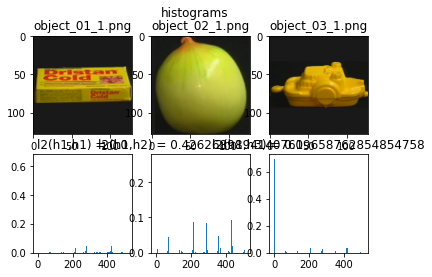

In [100]:
def firstC():
  I1 = imread("./dataset/object_01_1.png")
  I2 = imread("./dataset/object_02_1.png")
  I3 = imread("./dataset/object_03_1.png")
  hist1 = myhist3(I1, 8).reshape(-1)
  hist2 = myhist3(I2, 8).reshape(-1)
  hist3 = myhist3(I3, 8).reshape(-1)
  
  a, two = plt.subplots(2, 3)
  a.suptitle("histograms")

  two[0, 0].imshow(I1, cmap="gray")
  two[0, 0].set(title="object_01_1.png")

  two[0, 1].imshow(I2, cmap="gray")
  two[0, 1].set(title="object_02_1.png")

  two[0, 2].imshow(I3, cmap="gray")
  two[0, 2].set(title="object_03_1.png")

  two[1, 0].bar(height=hist1, x=range(len(hist1)), width=5)
  two[1, 0].set(title="l2(h1,h1) = " + str(euclidean_distance(hist1, hist1)))

  two[1, 1].bar(height=hist2, x=range(len(hist2)), width=4)
  two[1, 1].set(title="l2(h1,h2) = " + str(euclidean_distance(hist1, hist2)))

  two[1, 2].bar(height=hist3, x=range(len(hist3)), width=5)
  two[1, 2].set(title="l2(h1,h3) = " + str(euclidean_distance(hist1, hist3)))

  plt.show()

firstC()





You will now implement a simple image retrieval system that will use histograms.
Write a function that will accept the path to the image directory and the parameter
n_bins and then calculate RGB histograms for all images in the directory as well as
transform them to 1-D arrays. Store the histograms in an appropriate data structure.
Select some image from the directory dataset/ and compute the distance between
its histogram and all the other histograms you calculated before. Sort the list according
to the calculated similarity and display the reference image and the first
five most similar images to it. Also display the corresponding histograms. Do this
for all four distance measures that you implemented earlier.

[0.0, 0.07923444501722714, 0.1930322238831296, 0.220233849552801, 0.22565747540846848]


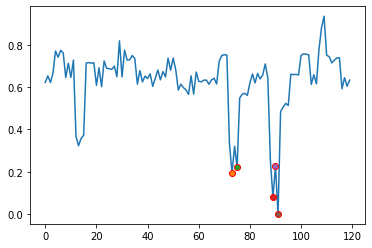

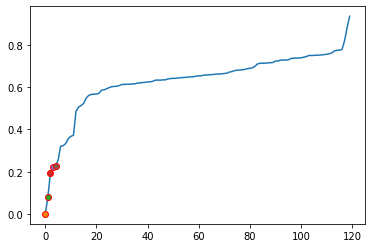

In [142]:
import os
import random

def firstD(directory, numbins):
  histograms = dict()
  for filename in os.listdir(directory):
    I_temp = imread(directory + filename)
    histograms[filename] = myhist3(I_temp, numbins).reshape(-1)
    
  image_name, hist = random.choice(list(histograms.items()))
  
  l2 = []
  hell = []
  inter =[]
  chi = []
  
  for k,v in histograms.items():
    l2.append((k,euclidean_distance(hist, v)))
    hell.append((k,helliger(hist, v)))
    inter.append((k, intersection(hist, v)))
    chi.append((k, chi_square(hist, v)))
  
  hell_whole = hell.copy()
  chi.sort(key=lambda x: x[1])
  hell.sort(key=lambda x: x[1])
  l2.sort(key=lambda x: x[1])
  inter.sort(key=lambda x: x[1])
  
 
  chi = chi[:5]
  hell = hell[:5]
  l2 = l2[:5]
  inter = inter[:5]
  
  every_distance = [(chi, "chi"), (hell, "hell"), (l2,"l2"), (inter,"inter")]
  
  # for i, (distance,name_of_distance) in enumerate(every_distance):
  #   a, two = plt.subplots(2, 5)
  #   a.suptitle(name_of_distance)
    
        
  #   for j, (name, hist) in enumerate(distance):
  #     two[0,j].imshow(imread(directory + name))
  #     two[0,j].set(title=name)
      
  #     two[1,j].bar(height=histograms[name], x=range(len(histograms[name])), width=5)
  #     two[1,j].set(title=str(hist))
      
  #   plt.show()
    
  # e
  min_5_hell = [x[1] for x in hell]
  print(min_5_hell)
  plt.plot([x[1] for x in hell_whole])
  for i,(_,x) in enumerate(hell_whole):
    if x in min_5_hell:
      plt.plot(i, x, marker="o", markeredgecolor="red")
  plt.show()
  hell_whole.sort(key=lambda x: x[1])
  plt.plot([x[1] for x in hell_whole])
  for i,(_,x) in enumerate(hell_whole):
    if x in min_5_hell:
      plt.plot(i, x, marker="o", markeredgecolor="red")
  plt.show()
  
firstD("./dataset/",8)

In [134]:
temp = [('object_20_4.png', 0.0), ('object_20_2.png', 0.0016401579037180975), ('object_20_3.png', 0.0018604764623243125), ('object_20_1.png', 0.00976110943383755), ('object_11_4.png', 0.034991915228909015)]

tempf = [i[1] for i in temp ]

print(tempf)
print(one)


[0.0, 0.0016401579037180975, 0.0018604764623243125, 0.00976110943383755, 0.034991915228909015]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
 

### Question
 Which distance is in your opinion best suited for image retrieval? How
does the retrieved sequence change if you use a different number of bins? Is the
execution time affected by the number of bins?
### Answer
in my opinion they are very close but with me checking it has to be the hellinger distance.
sequence changes, i noticed that the most "accurate" results are when we use large number of bins (it takes a while tho)
execution time is affected.



You can get a better sense of the differences in the distance values if you plot all
of them at the same time. Use the function plt.plot() to display image indices
on the x axis and distances to the reference image on the y axis. Display both the
unsorted and the sorted image sequence and mark the most similar values using a
circle (see pyplot documentation).